# Focus Areas Analysis

This notebook extracts and displays all distinct values from the "Focus Areas" column in the St. Gallen innovation ecosystem dataset.

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
# Load the dataset
file_path = 'START Hack 25_Canton of St.Gallen_dataset innovation ecosystem.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
df.head()

,Category,Institution,Name,Description,Focus Areas,Contact,Website
0,Academia,University of St.Gallen (HSG),School of Management (SoM-HSG),Research and teaching in business administrati...,"Business Strategy, Innovation, Leadership",som@unisg.ch,https://som.unisg.ch
1,Academia,University of St.Gallen (HSG),School of Finance (SoF-HSG),"Research on financial markets, banking, corpor...","Banking, Corporate Finance, Risk Management",sof@unisg.ch,https://sof.unisg.ch
2,Academia,University of St.Gallen (HSG),School of Economics and Political Science (SEP...,"Research on economic policy, macroeconomics, a...","Economic Policy, Macroeconomics, International...",seps@unisg.ch,https://seps.unisg.ch
3,Academia,University of St.Gallen (HSG),School of Law (LS-HSG),Legal research and education with a focus on b...,"Business Law, Technology Law, Corporate Law",law@unisg.ch,https://law.unisg.ch
4,Academia,University of St.Gallen (HSG),School of Humanities and Social Sciences (SHSS...,"Interdisciplinary research on society, ethics,...","Ethics, Philosophy, Social Innovation",shss@unisg.ch,https://shss.unisg.ch


In [5]:
# Extract all individual focus areas from the comma-separated list
all_focus_areas = []
for areas in df['Focus Areas']:
    # Split by comma and remove any leading/trailing whitespace
    focus_list = [area.strip() for area in areas.split(',')]
    all_focus_areas.extend(focus_list)

# Get distinct focus areas by converting to a set and then back to a sorted list
distinct_focus_areas = sorted(set(all_focus_areas))

# Print the number of distinct focus areas
print(f"Number of distinct focus areas: {len(distinct_focus_areas)}")

# Print all distinct focus areas
print("\nAll distinct focus areas:")
for area in distinct_focus_areas:
    print(f"- {area}")

Number of distinct focus areas: 177

All distinct focus areas:
- Accounting
- Additive Manufacturing
- Artificial Intelligence
- Automation
- Banking
- Biomedical Imaging
- Biotechnology
- Business Administration
- Business Ethics
- Business Growth
- Business Law
- Business Models
- Business Networking
- Business Strategy
- Cancer Research
- Circular Economy Research
- Civil Engineering
- Climate Protection
- Clinical Neurology
- Clinical Study Design
- Clinical Support
- Clinical Trials
- Coating Technologies
- Collaborative Innovation
- Commercialization
- Compliance
- Consulting
- Consumer Behavior
- Corporate Finance
- Corporate Governance
- Corporate Law
- Corporate Social Responsibility
- Corporate Strategy
- Cross-border Innovation
- Data Analysis
- Data Science
- Decision Psychology
- Digital Health
- Digital Innovation
- Digital Sustainability
- Digital Transformation
- Digitalization
- E-Health
- Economic Information
- Economic Policy
- Education
- Education & Training
- Elec

In [6]:
# Count occurrences of each focus area
focus_counts = Counter(all_focus_areas)

# Convert to DataFrame for easier visualization
focus_df = pd.DataFrame(list(focus_counts.items()), columns=['Focus Area', 'Count'])
focus_df = focus_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the frequency table
focus_df

,Focus Area,Count
0,Process Optimization,3
1,Corporate Strategy,3
2,Business Models,2
3,Technology,2
4,Research Collaboration,2
...,...,...
172,Data Analysis,1
173,E-Health,1
174,Mechatronics,1
175,Robotics,1


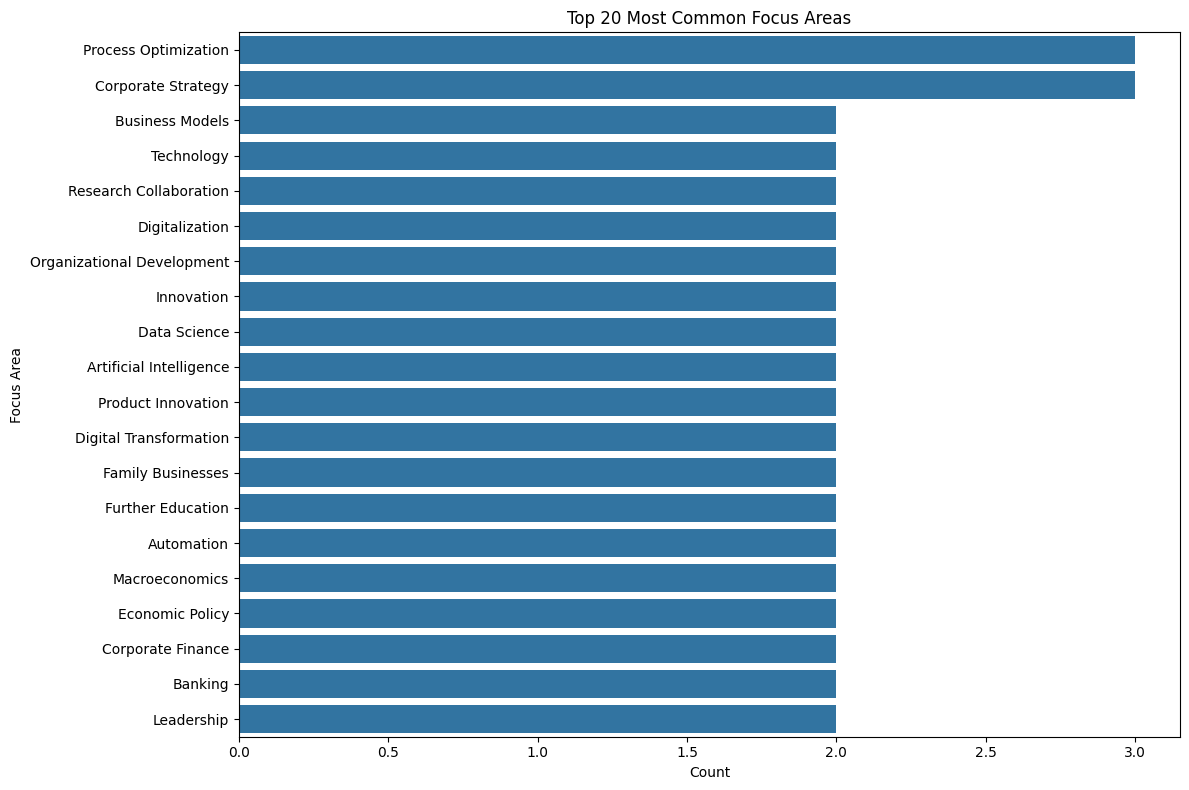

In [7]:
# Visualize the top 20 most common focus areas
plt.figure(figsize=(12, 8))
top_20 = focus_df.head(20)
sns.barplot(x='Count', y='Focus Area', data=top_20)
plt.title('Top 20 Most Common Focus Areas')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [8]:
# Check for similar focus areas that might be duplicates with slight variations
import difflib

# Find potential similar focus areas
similar_areas = []
for i, area1 in enumerate(distinct_focus_areas):
    matches = []
    for j, area2 in enumerate(distinct_focus_areas):
        if i != j and difflib.SequenceMatcher(None, area1.lower(), area2.lower()).ratio() > 0.8:
            matches.append(area2)
    if matches:
        similar_areas.append((area1, matches))

# Print potential duplicate focus areas
if similar_areas:
    print("Potential similar focus areas that might be duplicates:")
    for area, matches in similar_areas:
        print(f"'{area}' is similar to: {', '.join([f"'{m}'" for m in matches])}")
else:
    print("No potential duplicate focus areas found.")

Potential similar focus areas that might be duplicates:
'Biotechnology' is similar to: 'Technology'
'Corporate Finance' is similar to: 'Corporate Governance'
'Corporate Governance' is similar to: 'Corporate Finance'
'Digital Innovation' is similar to: 'Digitalization'
'Digitalization' is similar to: 'Digital Innovation'
'Electrical Engineering' is similar to: 'Mechanical Engineering'
'Environmental Technologies' is similar to: 'Environmental Technology'
'Environmental Technology' is similar to: 'Environmental Technologies'
'HR Management' is similar to: 'Management', 'Risk Management'
'IT Strategy' is similar to: 'Strategy'
'Industry Representation' is similar to: 'Interest Representation'
'Interest Representation' is similar to: 'Industry Representation'
'Management' is similar to: 'HR Management'
'Mechanical Engineering' is similar to: 'Electrical Engineering'
'Risk Management' is similar to: 'HR Management'
'Sensor Technologies' is similar to: 'Sensor Technology'
'Sensor Technology'

## Categorizing Focus Areas

Let's create some high-level categories for all the focus areas to get a better understanding of the main themes.

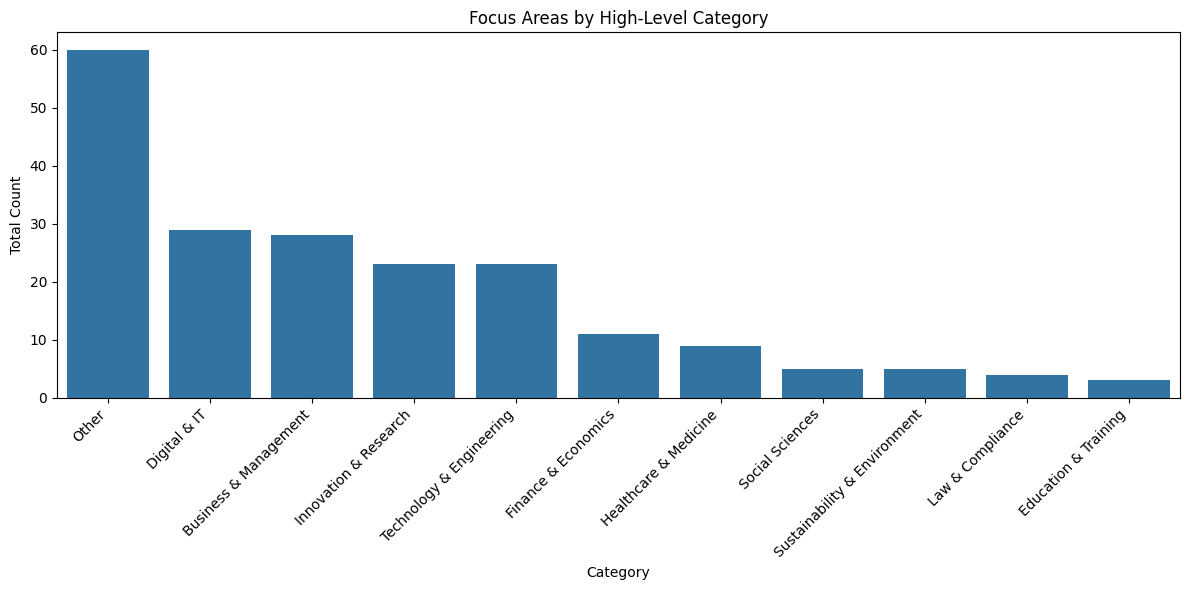

In [9]:
# Define some high-level categories and keywords associated with them
categories = {
    'Technology & Engineering': ['Engineering', 'Technology', 'Manufacturing', 'Automation', 'Robotics', 'Electrical', 'Mechanical', 'Sensor', 'Semiconductor'],
    'Digital & IT': ['Digital', 'IT', 'Software', 'Data', 'Artificial Intelligence', 'AI', 'Computer', 'ICT'],
    'Business & Management': ['Business', 'Management', 'Strategy', 'Corporate', 'Leadership', 'Organization'],
    'Finance & Economics': ['Finance', 'Economic', 'Banking', 'Corporate Finance', 'Financial'],
    'Healthcare & Medicine': ['Health', 'Medical', 'Nursing', 'Healthcare', 'Clinical'],
    'Innovation & Research': ['Innovation', 'Research', 'Development', 'R&D'],
    'Sustainability & Environment': ['Sustainable', 'Environment', 'Climate', 'Renewable', 'Recycling'],
    'Education & Training': ['Education', 'Training', 'Teaching', 'Further Education'],
    'Social Sciences': ['Social', 'Society', 'Ethics', 'Philosophy'],
    'Law & Compliance': ['Law', 'Legal', 'Compliance', 'Corporate Law']
}

# Function to categorize a focus area
def categorize_focus_area(area):
    for category, keywords in categories.items():
        if any(keyword.lower() in area.lower() for keyword in keywords):
            return category
    return 'Other'

# Categorize all focus areas
focus_df['Category'] = focus_df['Focus Area'].apply(categorize_focus_area)

# Count by category
category_counts = focus_df.groupby('Category')['Count'].sum().sort_values(ascending=False)

# Visualize categories
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Focus Areas by High-Level Category')
plt.xlabel('Category')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Export all distinct focus areas to a CSV file for further analysis
focus_df.to_csv('distinct_focus_areas.csv', index=False)
print("Exported all distinct focus areas to 'distinct_focus_areas.csv'")

Exported all distinct focus areas to 'distinct_focus_areas.csv'
